In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

D:\ana\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_train = pd.read_csv("cs-training.csv",index_col=0)
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
# Fill-in the missing values (nan) with the column means
df_train.fillna(df_train.mean(),inplace=True)

In [4]:
df_train.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# 1. Select the 2 most important features
using LogisticRegression with L1 penalty

In [5]:
from sklearn.model_selection import train_test_split

X, y = df_train.iloc[:, 1:].values, df_train.iloc[:, 0].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [6]:
# Bringing features onto the same scale
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_norm, y_train)
print('Training accuracy:', lr.score(X_train_norm, y_train))
print('Test accuracy:', lr.score(X_test_norm, y_test))

Training accuracy: 0.9336761904761904
Test accuracy: 0.9337777777777778


In [15]:
lr.coef_[lr.coef_!=0].shape

(8,)

### Lower the value of C to reduce the number of non-zero coefficients

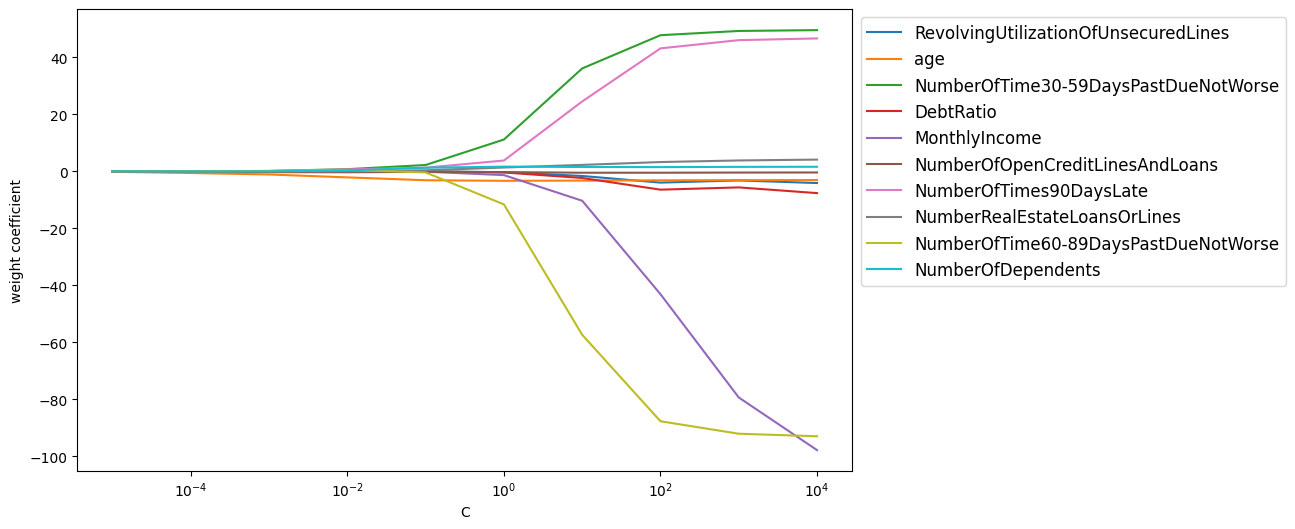

In [23]:
from sklearn.linear_model import LogisticRegression

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,solver='liblinear',multi_class='ovr')
    lr.fit(X_train_norm, y_train)
    weights.append(lr.coef_[0])
    params.append(10.**c)

plt.figure(figsize=(10, 6)) 
weights = np.array(weights)
for i in range(len(df_train.columns[1:])):
    plt.plot(params, weights[:, i], label=df_train.columns[1:][i])

plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 12})
plt.xscale('log')
plt.show()

In [16]:
for C in np.linspace(0, 0.1, 10, endpoint=False)[1:]:
    lr = LogisticRegression(penalty='l1', C=C, solver='liblinear', multi_class='ovr', random_state=1)
    lr.fit(X_train_norm, y_train)
    print("C =", C)
    print('Training accuracy:', lr.score(X_train_norm, y_train))
    print('Test accuracy:', lr.score(X_test_norm, y_test))
    print("number of non-zero coefficients =", lr.coef_[lr.coef_!=0].shape[0])
    print("--------------------")
    if lr.coef_[lr.coef_!=0].shape[0] == 2:
        break

C = 0.01
Training accuracy: 0.9331619047619047
Test accuracy: 0.9331555555555555
number of non-zero coefficients = 2
--------------------


In [7]:
from sklearn.linear_model import LogisticRegression
C = 0.01
lr = LogisticRegression(penalty='l1', C=C, solver='liblinear', multi_class='ovr', random_state=1)
lr.fit(X_train_norm, y_train)

LogisticRegression(C=0.01, multi_class='ovr', penalty='l1', random_state=1,
                   solver='liblinear')

In [8]:
index = lr.coef_!=0
index[0]

array([False,  True,  True, False, False, False, False, False, False,
       False])

In [9]:
X_train_2 = X_train[:,index[0]]
X_train_2

array([[61.,  0.],
       [68.,  0.],
       [34.,  0.],
       ...,
       [51.,  0.],
       [54.,  0.],
       [38.,  0.]])

In [10]:
X_test_2 = X_test[:,index[0]]
X_test_2

array([[49.,  1.],
       [51.,  0.],
       [49.,  0.],
       ...,
       [52.,  2.],
       [68.,  0.],
       [72.,  0.]])

In [11]:
print("The two variables selected through LogisticRegression with L1 penalty are "+df_train.columns[1:][index[0]][0]+" and "+df_train.columns[1:][index[0]][1])

The two variables selected through LogisticRegression with L1 penalty are age and NumberOfTime30-59DaysPastDueNotWorse


# 2.LogisticRegression

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(random_state=1)
# Using cross validation to obtain optimal parameter value
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_2, y_train)
print("Best value of C in Logistic Regression model is :", grid_search.best_params_)
print("Best value of the average accuracy of the testing section in all folds is :", grid_search.best_score_)

Best value of C in Logistic Regression model is : {'C': 0.001}
Best value of the average accuracy of the testing section in all folds is : 0.9333523809523809


In [24]:
# Evaluate the model on the test set
best_lr = grid_search.best_estimator_
test_accuracy = best_lr.score(X_test_2, y_test)
print("Prediction accuary on the test set:", test_accuracy)

Prediction accuary on the test set: 0.9332666666666667


In [25]:
len(y_train),len(y_test)

(105000, 45000)

C:\Users\LAB506\AppData\Local\Temp/ipykernel_2880/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


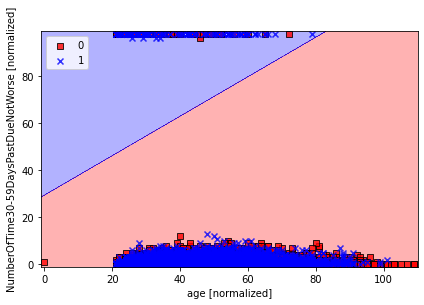

In [26]:
X_combined = np.vstack((X_train_2, X_test_2)) 
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=best_lr)
plt.xlabel('age [normalized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [normalized]')
plt.legend(loc='upper left')
 
plt.tight_layout() 
plt.show()

# 3.SVM

In [27]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1, 10]}
model_name = "SVM"
model = SVC(kernel='linear', random_state=1)
# Using cross validation to obtain optimal parameter value
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_2, y_train)
print("Best values of hyperparameters in "+model_name+" model are :", grid_search.best_params_)
print("Best value of the average accuracy of the testing section in all folds is :", grid_search.best_score_)
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_2, y_test)
print("Prediction accuary on the test set of "+model_name+"model is :", test_accuracy)

Best values of hyperparameters in SVM model are : {'C': 10}
Best value of the average accuracy of the testing section in all folds is : 0.9334857142857143
Prediction accuary on the test set of SVMmodel is : 0.9333555555555556


C:\Users\LAB506\AppData\Local\Temp/ipykernel_13988/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


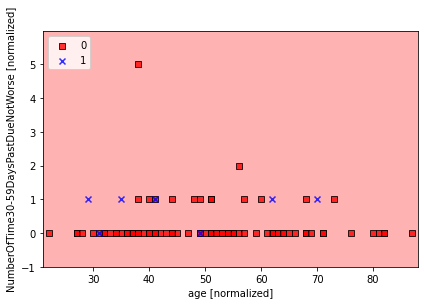

In [17]:
# (105000, 45000)
X_combined = np.vstack((X_train_2, X_test_2)) 
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined[104950:105050,:], y=y_combined[104950:105050],
                      classifier=best_model)
plt.xlabel('age [normalized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [normalized]')
plt.legend(loc='upper left')
 
plt.tight_layout() 
plt.show()

### Using the kernel trick to find separating hyperplanes in higher dimensional space

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1.0, 10.0], 'gamma': [0.1, 1.0, 10.0]}
model_name = "SVM_rbf kernel"
model = SVC(kernel='rbf', random_state=1)
# Using cross validation to obtain optimal parameter value
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_2, y_train)
print("Best values of hyperparameters in "+model_name+" model are :", grid_search.best_params_)
print("Best value of the average accuracy of the testing section in all folds is :", grid_search.best_score_)
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_2, y_test)
print("Prediction accuary on the test set of "+model_name+"model is :", test_accuracy)

Best values of hyperparameters in SVM_rbf kernel model are : {'C': 1.0, 'gamma': 0.1}
Best value of the average accuracy of the testing section in all folds is : 0.9333428571428571
Prediction accuary on the test set of SVM_rbf kernelmodel is : 0.9333555555555556


C:\Windows\Temp\ipykernel_5696\2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


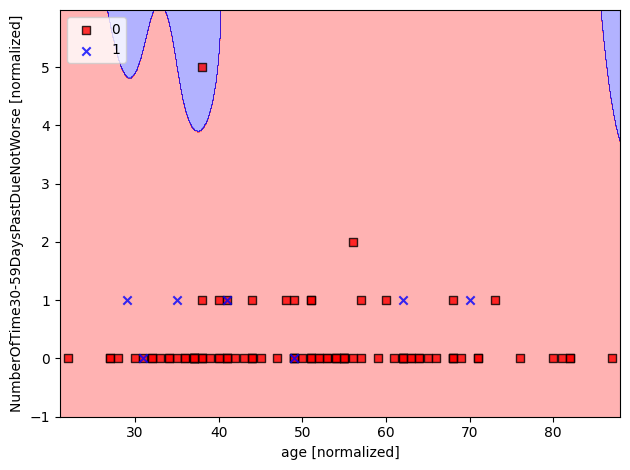

In [17]:
plot_decision_regions(X=X_combined[104950:105050,:], y=y_combined[104950:105050],
                      classifier=best_model)
plt.xlabel('age [normalized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [normalized]')
plt.legend(loc='upper left')
 
plt.tight_layout() 
plt.show()

# 4.Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model_name = "Decision Tree"
dt = DecisionTreeClassifier(random_state=1)
param_grid = {'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5]}
# Using cross validation to obtain optimal parameter value
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_2, y_train)
print("Best values of hyperparameters in "+model_name+" model are :", grid_search.best_params_)
print("Best value of the average accuracy of the testing section in all folds is :", grid_search.best_score_)
# Evaluate the model on the test set
best_tree = grid_search.best_estimator_
test_accuracy = best_tree.score(X_test_2, y_test)
print("Prediction accuary on the test set of "+model_name+"model is :", test_accuracy)

Best values of hyperparameters in Decision Tree model are : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best value of the average accuracy of the testing section in all folds is : 0.9333238095238094
Prediction accuary on the test set of Decision Treemodel is : 0.9333555555555556


C:\Windows\Temp\ipykernel_19124\2458188530.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


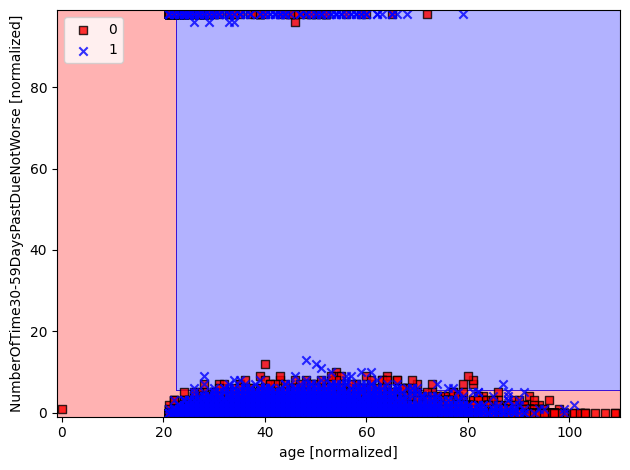

In [17]:
X_combined = np.vstack((X_train_2, X_test_2)) 
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=best_tree)
plt.xlabel('age [normalized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [normalized]')
plt.legend(loc='upper left')
 
plt.tight_layout() 
plt.show()

# 5.Compare different classifiers
through AUC

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression(C=0.001,random_state=1) 
svc_linear = SVC(C=10, kernel = 'linear', random_state=1, probability=True)
svc_rbf = SVC(C=1, gamma=0.1, kernel='rbf', random_state=1,probability=True)
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=1)
models = [lr,svc_linear,svc_rbf,dt]
model_names = ["Logistic Regression","Linear SVM","Non-linear SVM","Decision Tree"]
predictions = []
for model in models:
    model.fit(X_train_2, y_train)
    # Obtain prediction probability
    #if hasattr(model, "predict_proba"): 
    y_proba = model.predict_proba(X_test_2)[:, 1]  # probability of y = 1
    #else:
        #y_proba = model.decision_function(X_test_2)  # 或者获取决策函数值
        #y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # 对决策函数值进行归一化处理
    predictions.append(y_proba)

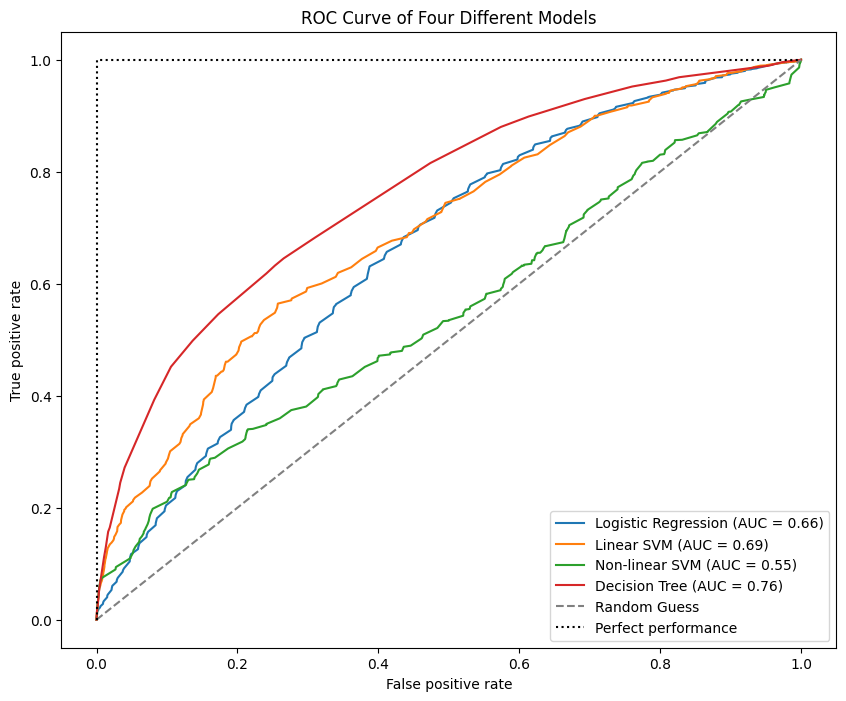

In [21]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))


for i in range(len(predictions)):
    
    fpr, tpr, _ = roc_curve(y_test, predictions[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

# Draw the ROC curve of a random guessing model
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Draw the ROC curve of the perfet model
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

# Add titles and labels
plt.title('ROC Curve of Four Different Models')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

# Show Legend 
plt.legend()

plt.show()